# Niloufar Baba Ahmadi 610398103 MiniProject2 Q2

### Imports

In [231]:
import pandas as pd
import numpy as np
import math
from numpy.linalg import inv
from random import sample
import random
import matplotlib.pyplot as plt

### Reading the train set

In [232]:
df_train = pd.read_csv('/content/drive/MyDrive/deep learning/miniproject2/MiniProject2/Dataset/Problem 2/train_set.csv')
df_train.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
1,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
2,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
3,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7
4,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3
5,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8
6,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62,10.2
7,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6
8,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
9,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0


### Reading the test set

In [233]:
df_test = pd.read_csv('/content/drive/MyDrive/deep learning/miniproject2/MiniProject2/Dataset/Problem 2/test_set.csv')
df_test.head(10)

df_res = df_test.copy(deep=True)

### Add $ x_{0} $

according to the formula of regression we have:

$ f_{w,b}(x^i) = w x^i + b $

where,

$ b = w x^0$

So to find the weight for $x^0$ s or in other words the value of bias, we must have a column with the value one since from math we know that $x^0 = 1$. That is why we added a column that has only the value 1.

In [234]:
one_ls = []

for i in range(df_test.shape[0]):

    one_ls.append(1)

df_test['x_0'] = one_ls

for i in range(306):

    one_ls.append(1)

df_train['x_0'] = one_ls

df_train.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target,x_0
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4,1
1,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8,1
2,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6,1
3,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7,1
4,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3,1
5,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8,1
6,14.33370,0.0,18.10,0.0,0.700,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62,10.2,1
7,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6,1
8,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0,1
9,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0,1


### Normalization

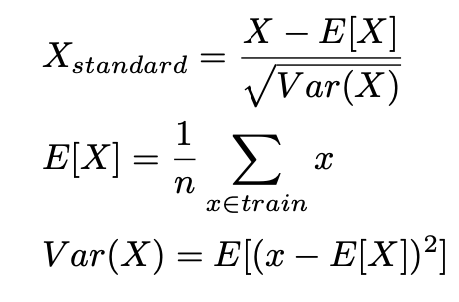

In [235]:
def E(x):

    n = len(x)
    sum = 0

    for i in range(n):

        sum += x[i] 

    sum /= n

    return sum


In [236]:
def var(x):

    n = len(x)
    e = E(x)

    sub = []

    for i in range(n):

        temp = (x[i] - e) ** 2

        sub.append(temp)

    return E(sub)

In [237]:
def norm(x):  

    n= len(x)

    # Fraction part
    v = var(x)
    v = math.sqrt(v)

    # E(x)
    e = E(x)

    ans = []

    for i in range(n):

        temp = (x[i] - e) / v
        ans.append(temp)

    return ans           

### Normalization of the train data

In [238]:
for column in df_train:

    if column != 'x_0':

        # print(df_train[column].tolist())

        df_train[column] = norm(df_train[column].tolist())

df_train.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target,x_0
0,-0.399550,0.395154,-0.617818,-0.282466,-0.790261,0.357484,-0.378985,0.063415,-0.749382,-1.085504,0.029377,0.407320,-0.705939,0.218918,1
1,0.614731,-0.473458,1.014199,-0.282466,1.598047,-0.918400,0.889019,-0.925517,1.659831,1.541751,0.789657,0.429288,1.427959,-1.039186,1
2,-0.151998,-0.473458,1.014199,-0.282466,0.239481,-0.576670,-0.984169,-0.027695,1.659831,1.541751,0.789657,0.132943,0.084237,-0.193220,1
3,-0.406284,-0.473458,-1.137895,-0.282466,-0.573928,1.115171,-0.220485,-0.173424,-0.864107,-0.806766,-0.350764,0.419776,-0.991868,0.685284,1
4,-0.396609,-0.473458,-0.625143,-0.282466,-0.928713,-0.159312,-2.255774,0.912550,-0.749382,-1.026198,-0.303246,0.276077,-0.976374,0.316530,1
5,0.987778,-0.473458,1.014199,-0.282466,1.598047,-0.600479,0.986280,-0.888602,1.659831,1.541751,0.789657,-1.341537,1.556134,-1.256101,1
6,1.155228,-0.473458,1.014199,-0.282466,1.251916,-1.964596,1.108758,-1.032730,1.659831,1.541751,0.789657,0.157742,2.518148,-1.321175,1
7,1.164752,-0.473458,1.014199,-0.282466,1.598047,0.249643,0.867405,-0.838221,1.659831,1.541751,0.789657,-3.753859,0.747647,-1.386250,1
8,3.781473,-0.473458,1.014199,-0.282466,1.191343,-1.162092,1.108758,-1.079768,1.659831,1.541751,0.789657,0.429288,2.513923,-1.885153,1
9,-0.192278,-0.473458,1.231020,-0.282466,0.429853,2.305622,0.971871,-0.817833,-0.519933,-0.017996,-1.823807,0.116750,-1.273570,2.995425,1


### Optimal Linear weight vector for regression with regularization

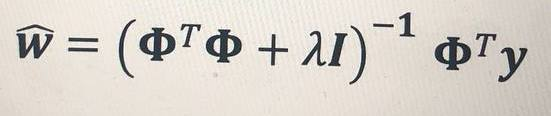

In [239]:
def weight(mat_x, mat_y, l): # l = lambda

    mat_x_t = np.transpose(mat_x)

    temp = np.dot(mat_x_t, mat_x)
    temp = np.add(temp, np.dot(l, np.identity(temp.shape[0])))
    temp = np.float64(temp)
    temp = inv(temp)
    temp = np.dot(temp, mat_x_t)
    temp = np.dot(temp, mat_y)

    return temp

### Calculating Cost

We will calculate MSE loss which is found using the formula below:

$J(w,b)= \frac{1}{2m} \sum _{i=0} ^{m-1} cost^{(i)} $

where,

$cost^{(i)} = (f_{w,b} - y^{(i)})^2$

and

$ f_{w,b}(x^i) = w x^i + b $


In [240]:
def compute_cost(x, y, w): 
    
    m = x.shape[0] 
    total_cost = 0 

    f_wb = np.dot(x, w)
    cost_i = np.subtract(f_wb, y)
    cost_i = np.power(cost_i, 2)
    total_cost = np.sum(cost_i)

    total_cost = total_cost / (2 * m)

    return total_cost

### Prediction

Mske predictions based on regression formula.

$ f_{w,b}(x^i) = w x^i + b $

In [241]:
def predict(mat_x, w): 

    pred =  np.dot(mat_x, w)

    return pred

### K-fold cross validation

we randomly sample from the train data fram until we have 5 different folds, then iterate from 1 to 5; the iteration number determines the validation set. We will train on all folds except the validation set.

In [242]:
def create_kfolds(dataset): #k = 5

    k = 5
    folds = []
    size = dataset.shape[0]
    num_of_elements = int(size / k)

    df1 = pd.DataFrame(columns = dataset.columns)
    df2 = pd.DataFrame(columns = dataset.columns)
    df3 = pd.DataFrame(columns = dataset.columns)
    df4 = pd.DataFrame(columns = dataset.columns)
    df5 = pd.DataFrame(columns = dataset.columns)

    new_sample = dataset.sample(n = num_of_elements)

    df1 = df1.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df2 = df2.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df3 = df3.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df4 = df4.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)

    new_sample = dataset.sample(n = num_of_elements)

    df5 = df5.append(new_sample, ignore_index=True)
    dataset.drop(new_sample.index, inplace=True)       

    return df1, df2, df3, df4, df5


def cross_val(df, x_cols, lam):

    train_err = []
    cv_err = []

    df_temp = df.copy(deep=True)
    df1, df2, df3, df4, df5 = create_kfolds(df_temp)
    ls = [df1, df2, df3, df4, df5]

    for i in range(5):

        cv = ls[i]
        ts = []

        for j in range(5):

            if j != i:

                ts.append(ls[j])

        df_ts = pd.concat(ts, axis=0)

        x = df_ts[x_cols].to_numpy()
        y = df_ts[['target']].to_numpy()

        x_cv = cv[x_cols].to_numpy()
        y_cv = cv[['target']].to_numpy()

        w_ls = weight(x, y, lam)

        train_err.append(compute_cost(x, y, w_ls))
        
        cv_err.append(compute_cost(x_cv, y_cv, w_ls))

    return train_err, cv_err

l = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'x_0']


### Altering the sets

We are asked to repeat training with degrees 3 and 5 so we must add extra features for that!

In [243]:
c = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']

for col in c:

    s = ''

    for j in range(2,6):

        s = col + '_' + str(j)
        temp = []
        temp_t = []

        for i in range(df_train.shape[0]):

            x = df_train[col][i]
            temp.append(x**j)

        df_train[s] = temp

        for k in range(df_test.shape[0]):

            x_ = df_test[col][k]
            temp_t.append(x_**j)

        df_test[s] = temp_t
        

df_train.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f11_4,f11_5,f12_2,f12_3,f12_4,f12_5,f13_2,f13_3,f13_4,f13_5
0,-0.399550,0.395154,-0.617818,-0.282466,-0.790261,0.357484,-0.378985,0.063415,-0.749382,-1.085504,...,7.447428e-07,2.187801e-08,0.165910,0.067578,0.027526,0.011212,0.498350,-0.351805,0.248353,-0.175322
1,0.614731,-0.473458,1.014199,-0.282466,1.598047,-0.918400,0.889019,-0.925517,1.659831,1.541751,...,3.888251e-01,3.070385e-01,0.184288,0.079113,0.033962,0.014580,2.039066,2.911703,4.157792,5.937156
2,-0.151998,-0.473458,1.014199,-0.282466,0.239481,-0.576670,-0.984169,-0.027695,1.659831,1.541751,...,3.888251e-01,3.070385e-01,0.017674,0.002350,0.000312,0.000042,0.007096,0.000598,0.000050,0.000004
3,-0.406284,-0.473458,-1.137895,-0.282466,-0.573928,1.115171,-0.220485,-0.173424,-0.864107,-0.806766,...,1.513765e-02,-5.309737e-03,0.176212,0.073970,0.031051,0.013034,0.983802,-0.975801,0.967866,-0.959995
4,-0.396609,-0.473458,-0.625143,-0.282466,-0.928713,-0.159312,-2.255774,0.912550,-0.749382,-1.026198,...,8.456314e-03,-2.564344e-03,0.076218,0.021042,0.005809,0.001604,0.953306,-0.930784,0.908793,-0.887322
5,0.987778,-0.473458,1.014199,-0.282466,1.598047,-0.600479,0.986280,-0.888602,1.659831,1.541751,...,3.888251e-01,3.070385e-01,1.799721,-2.414392,3.238996,-4.345232,2.421552,3.768258,5.863913,9.125031
6,1.155228,-0.473458,1.014199,-0.282466,1.251916,-1.964596,1.108758,-1.032730,1.659831,1.541751,...,3.888251e-01,3.070385e-01,0.024883,0.003925,0.000619,0.000098,6.341072,15.967759,40.209188,101.252704
7,1.164752,-0.473458,1.014199,-0.282466,1.598047,0.249643,0.867405,-0.838221,1.659831,1.541751,...,3.888251e-01,3.070385e-01,14.091454,-52.897327,198.569086,-745.400269,0.558976,0.417916,0.312454,0.233605
8,3.781473,-0.473458,1.014199,-0.282466,1.191343,-1.162092,1.108758,-1.079768,1.659831,1.541751,...,3.888251e-01,3.070385e-01,0.184288,0.079113,0.033962,0.014580,6.319808,15.887511,39.939977,100.406023
9,-0.192278,-0.473458,1.231020,-0.282466,0.429853,2.305622,0.971871,-0.817833,-0.519933,-0.017996,...,1.106409e+01,-2.017877e+01,0.013631,0.001591,0.000186,0.000022,1.621982,-2.065708,2.630825,-3.350541


### Training phase

We are asked to train with regression models with degrees 1, 3 and 5 and we are also asked to train using 3 different values for $λ$ (0, 1 and 10) each time using Repeated 5 Fold Cross-Validation with 10 repetitions.

In [244]:
ls1 = []
ls3 = []
ls5 = []

for column in df_train:

    if column != 'target':

        if ('_2' not in column) and ('_3' not in column) and ('_4' not in column) and ('_5' not in column):

            ls1.append(column)

        if ('_4' not in column) and ('_5' not in column):

            ls3.append(column)

        ls5.append(column)

print(ls1)
print(ls3)
print(ls5)

deg = [1, 3, 5]
lam = [0, 1, 10]

t_dict = {}
cv_dict = {}

for i in deg:
  
    for j in lam:

        s = ''
        s = 'd = ' + str(i) + ' lamba = ' + str(j)

        temp_t = []
        temp_cv= []

        for k in range(10):

            if i == 1:

                temp_t, temp_cv = cross_val(df_train, ls1, j)

            if i == 3:

                temp_t, temp_cv = cross_val(df_train, ls3, j)

            if i == 5:

                temp_t, temp_cv = cross_val(df_train, ls5, j)
            
            t_dict[s] = temp_t
            cv_dict[s] = temp_cv


['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'x_0']
['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'x_0', 'f1_2', 'f1_3', 'f2_2', 'f2_3', 'f3_2', 'f3_3', 'f4_2', 'f4_3', 'f5_2', 'f5_3', 'f6_2', 'f6_3', 'f7_2', 'f7_3', 'f8_2', 'f8_3', 'f9_2', 'f9_3', 'f10_2', 'f10_3', 'f11_2', 'f11_3', 'f12_2', 'f12_3', 'f13_2', 'f13_3']
['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'x_0', 'f1_2', 'f1_3', 'f1_4', 'f1_5', 'f2_2', 'f2_3', 'f2_4', 'f2_5', 'f3_2', 'f3_3', 'f3_4', 'f3_5', 'f4_2', 'f4_3', 'f4_4', 'f4_5', 'f5_2', 'f5_3', 'f5_4', 'f5_5', 'f6_2', 'f6_3', 'f6_4', 'f6_5', 'f7_2', 'f7_3', 'f7_4', 'f7_5', 'f8_2', 'f8_3', 'f8_4', 'f8_5', 'f9_2', 'f9_3', 'f9_4', 'f9_5', 'f10_2', 'f10_3', 'f10_4', 'f10_5', 'f11_2', 'f11_3', 'f11_4', 'f11_5', 'f12_2', 'f12_3', 'f12_4', 'f12_5', 'f13_2', 'f13_3', 'f13_4', 'f13_5']


In [245]:
print(t_dict) 
print(cv_dict)

{'d = 1 lamba = 0': [0.1301136295594844, 0.13592364117417266, 0.11451117039271273, 0.11343609877460104, 0.1218190684736657], 'd = 1 lamba = 1': [0.12112009132783041, 0.12361923867696743, 0.13062952676314937, 0.1296420905420526, 0.12031425875453061], 'd = 1 lamba = 10': [0.12892004578477187, 0.13127854451912457, 0.11506128910186256, 0.12677341583042515, 0.12400138823806901], 'd = 3 lamba = 0': [0.0758704264741245, 0.06359045253188308, 0.07935577065145834, 0.06270191736073741, 0.0767699145823629], 'd = 3 lamba = 1': [0.07080429035742124, 0.07789724286422064, 0.06306221854750554, 0.06946916961720767, 0.08099270610674295], 'd = 3 lamba = 10': [0.07818268261757712, 0.06655325885871097, 0.07497445790603675, 0.07931767462046614, 0.0844163393709317], 'd = 5 lamba = 0': [0.05814101668757933, 0.047727735931828184, 0.058706190352756496, 0.06434742328970688, 0.050048404245793585], 'd = 5 lamba = 1': [0.05135578084762538, 0.05436543666234314, 0.05536762654340072, 0.05942067413769771, 0.063912116535

In [246]:
temp_dict1 = {}
temp_dict3 = {}
temp_dict5 = {}

for key in t_dict.keys():

    if 'd = 1' in key:

        temp_dict1[key] = t_dict[key]
        temp_dict1[key + '(cv)'] = cv_dict[key]

    if 'd = 3' in key:

        temp_dict3[key] = t_dict[key]
        temp_dict3[key + '(cv)'] = cv_dict[key]

    if 'd = 5' in key:

        temp_dict5[key] = t_dict[key]
        temp_dict5[key + '(cv)'] = cv_dict[key]

[Text(0, 0, 'd = 1 lamba = 0'),
 Text(0, 0, 'd = 1 lamba = 0(cv)'),
 Text(0, 0, 'd = 1 lamba = 1'),
 Text(0, 0, 'd = 1 lamba = 1(cv)'),
 Text(0, 0, 'd = 1 lamba = 10'),
 Text(0, 0, 'd = 1 lamba = 10(cv)')]

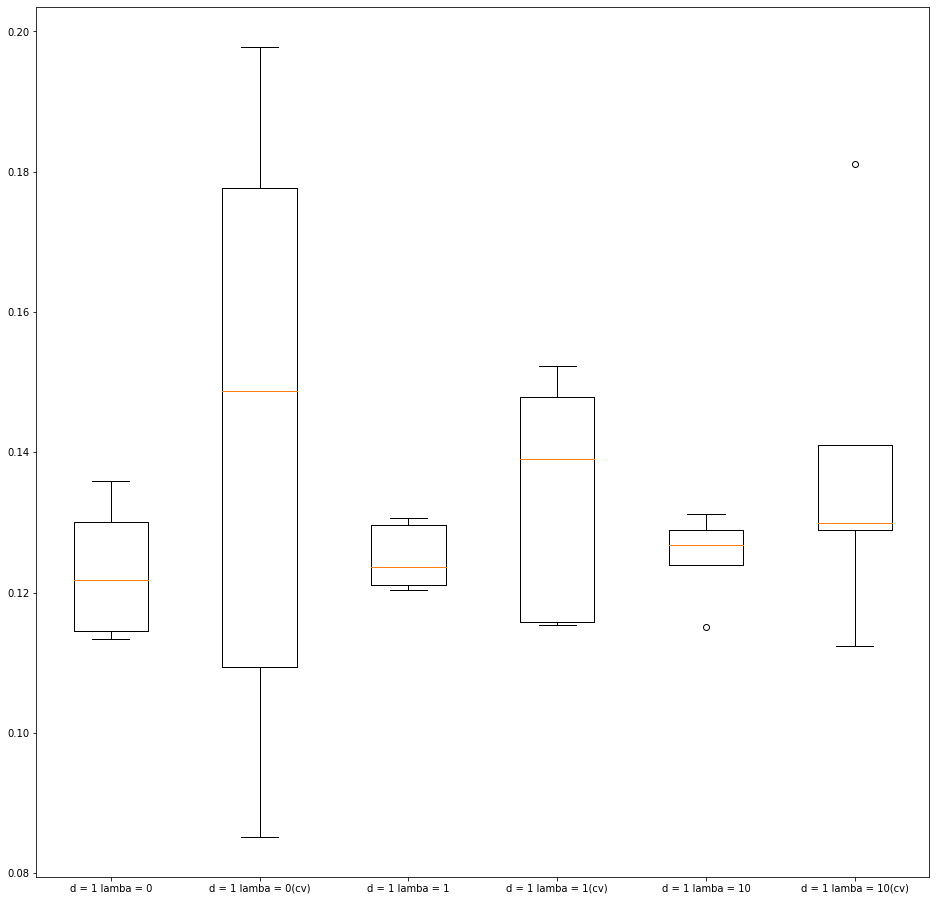

In [247]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.boxplot(temp_dict1.values())
ax.set_xticklabels(temp_dict1.keys())

[Text(0, 0, 'd = 3 lamba = 0'),
 Text(0, 0, 'd = 3 lamba = 0(cv)'),
 Text(0, 0, 'd = 3 lamba = 1'),
 Text(0, 0, 'd = 3 lamba = 1(cv)'),
 Text(0, 0, 'd = 3 lamba = 10'),
 Text(0, 0, 'd = 3 lamba = 10(cv)')]

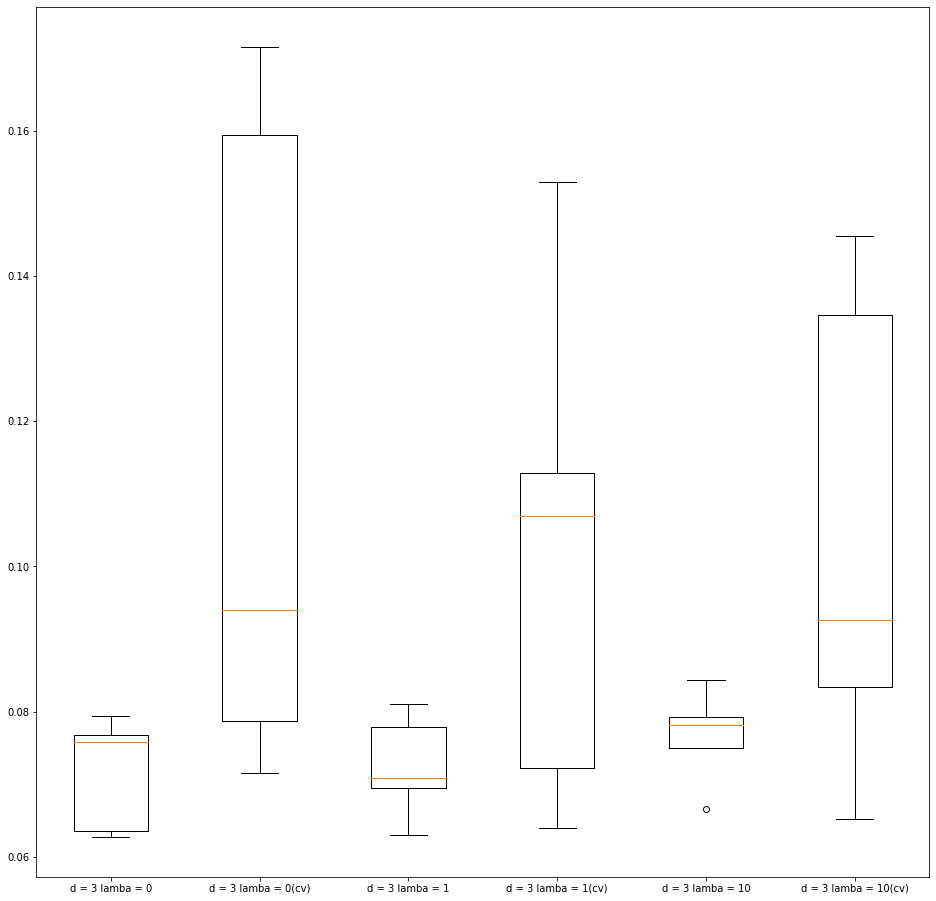

In [248]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.boxplot(temp_dict3.values())
ax.set_xticklabels(temp_dict3.keys())

[Text(0, 0, 'd = 5 lamba = 0'),
 Text(0, 0, 'd = 5 lamba = 0(cv)'),
 Text(0, 0, 'd = 5 lamba = 1'),
 Text(0, 0, 'd = 5 lamba = 1(cv)'),
 Text(0, 0, 'd = 5 lamba = 10'),
 Text(0, 0, 'd = 5 lamba = 10(cv)')]

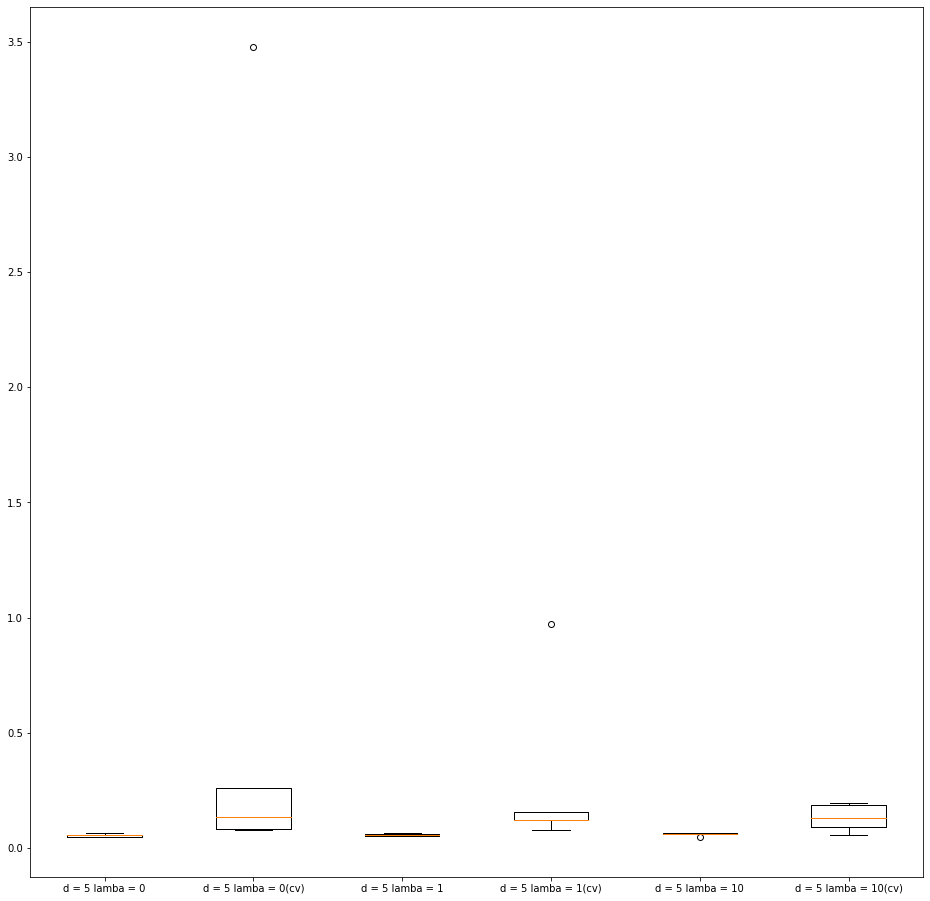

In [249]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.boxplot(temp_dict5.values())
ax.set_xticklabels(temp_dict5.keys())

To choose the best degree we can look at the means of the box plots. 

- We can clearly see that when the polynomial degree is equal to 5, the error on the train set decreases significantly and has less variet while the error on the cross validation set is higher and even resches 0.2! it is clear that our model is mesmorizing the train set values and therefore, performs poorly on unseen data; in other words, overfitting is occuring due to complexity of the model

- When polynomial degree is equal to 3, if we take a look at when lambda is equal to 0; it becomes clear that the error on the train set is much lower than the error on the cross validation set which conveys the fact that once again overfitting is happening; however when we increase lamba to 1, it causes the model to become more 'simple' and therefore resistant to overfitting. When we continue to increse lambda to 10, the error becomes highr meaning that the model has now become too simple and is actually underfitting.

- The linear regression yields very good results  and it seem to yield even better results when lambda is equal to 0 and 1 which is to be expected since linear regression is a simple model! 



Few things to keep in mind when choosing the right lambda: 

- If lambda value is too high, the model will be simple and there is a risk of underfitting data. 
- If lambda value is too low, the model will be more complex and there is the risk of overfitting data.
- The best lambda can be defined as the lambda that minimize the cross-validation prediction error rate.

### Prediction on the test 

Considering the results we found above, I chose to use polynomial regression (degree = 3) with labda that equals 1.3 since the lambda that equals 0 is too low and if we have lambda equal to 1, it still is a complex model.

In [250]:
l = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'x_0', 'f1_2', 'f1_3', 'f2_2', 'f2_3', 'f3_2', 'f3_3', 'f4_2', 'f4_3', 'f5_2', 'f5_3', 'f6_2', 'f6_3', 'f7_2', 'f7_3', 'f8_2', 'f8_3', 'f9_2', 'f9_3', 'f10_2', 'f10_3', 'f11_2', 'f11_3', 'f12_2', 'f12_3', 'f13_2', 'f13_3']


x = df_train[l].to_numpy()
y = df_train[['target']].to_numpy()

w_ls = weight(x, y, 1.3)

print(compute_cost(x, y, w_ls))

0.07495237929903467


In [251]:
x_ = df_test[l].to_numpy()
y_ = predict(x_, w_ls)

df_res['y'] = y_
df_res.to_csv("prediction.csv")

df_res.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,y
0,0.05646,0.0,12.83,0.0,0.4370,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,-1.064260e+07
1,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,-2.316807e+06
2,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,-1.687869e+06
3,10.83420,0.0,18.10,0.0,0.6790,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,-4.737389e+07
4,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,-1.061786e+07
5,18.81100,0.0,18.10,0.0,0.5970,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,-4.736304e+07
6,0.04379,80.0,3.37,0.0,0.3980,5.787,31.1,6.6115,4.0,337.0,16.1,396.90,10.24,-6.706915e+06
7,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,-2.345630e+06
8,0.04011,80.0,1.52,0.0,0.4040,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,-6.279497e+06
9,0.05644,40.0,6.41,1.0,0.4470,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,-3.208281e+06
